<a href="https://colab.research.google.com/github/Lightday15/AgenteViajero/blob/main/N4_S4_Pr%C3%A1ctica_Redes_Convolucionales_(Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica - Redes Convolucionales (CNN)

## Importancia del entrenamiento de CNN con GPU en Google Colab

El entrenamiento de modelos de aprendizaje profundo, especialmente redes neuronales convolucionales (CNN), es computacionalmente intensivo y puede ser extremadamente lento si se realiza solo con CPU. El uso de GPUs (Unidades de Procesamiento Gráfico) se ha convertido en una práctica estándar para acelerar el entrenamiento de estos modelos debido a su capacidad para manejar múltiples operaciones en paralelo. En este contexto, entrenar una CNN utilizando una GPU como la Tesla T4 disponible en Google Colab ofrece varias ventajas significativas:

### Mayor velocidad de procesamiento
Las GPUs están diseñadas específicamente para realizar cálculos matemáticos complejos de manera eficiente, lo cual es crucial para las operaciones de álgebra lineal en el entrenamiento de redes neuronales. La Tesla T4, con su arquitectura optimizada para cálculos de precisión simple y doble, puede proporcionar un rendimiento sustancialmente mayor comparado con CPUs tradicionales. Esto se traduce en una reducción significativa en el tiempo de entrenamiento, permitiendo iterar más rápidamente sobre diferentes configuraciones de modelos y hiperparámetros.

### Eficiencia en el entrenamiento
La capacidad de la Tesla T4 para ejecutar miles de hilos en paralelo hace que sea excepcionalmente buena en la manipulación de grandes volúmenes de datos y operaciones complejas típicas en las capas convolucionales y de pooling de las CNNs. Esto no solo mejora la velocidad, sino también la eficiencia del proceso de entrenamiento, aprovechando al máximo los recursos computacionales disponibles.

### Accesibilidad en Google Colab
Google Colab proporciona acceso gratuito a GPUs como la Tesla T4, lo que hace que el entrenamiento de modelos avanzados sea accesible sin necesidad de una inversión significativa en hardware especializado. Esto democratiza el acceso a las herramientas de aprendizaje profundo, permitiendo a estudiantes, investigadores y desarrolladores de todo el mundo experimentar y construir soluciones de IA avanzadas.

### Consideraciones Prácticas
Para aprovechar una GPU en Google Colab, asegúrate de seleccionar la opción de entorno de ejecución adecuada:
1. Ve a `Entorno de ejecución` > `Cambiar tipo de entorno de ejecución`.
2. Elige `GPU` como acelerador de hardware.
3. Guarda y confirma la configuración para habilitar el uso de la GPU en tu notebook.

# Redes Neuronales Convolucionales (CNN)

En esta notebook, exploraremos el funcionamiento y la implementación de las Redes Neuronales Convolucionales (CNNs) usando el famoso dataset MNIST de dígitos manuscritos. Las CNNs son particularmente poderosas para tareas de visión por computadora como la clasificación de imágenes. Compararemos su rendimiento con un modelo de Perceptrón Multicapa (MLP) para demostrar su eficacia en la clasificación de imágenes.


In [ ]:
# Importación de librerías necesarias

import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## Carga y Preprocesamiento de Datos

Antes de construir nuestro modelo, necesitamos cargar y preprocesar el dataset MNIST, que incluye imágenes de dígitos manuscritos. Este preprocesamiento incluye la normalización de los datos y su adecuación para ser procesados por nuestras CNN.


In [ ]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalización y reshaping de los datos
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Verificar shapes de los datasets
print("Train set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


## Importancia de la Normalización en el Procesamiento de Imágenes

La normalización de datos es un paso crucial en el preprocesamiento de imágenes antes de su uso en modelos de aprendizaje automático, particularmente en redes neuronales. Este proceso implica ajustar la escala de los valores de los píxeles de modo que estén dentro de un rango específico, generalmente entre 0 y 1 o entre -1 y 1. La normalización ayuda a mejorar la convergencia del modelo durante el entrenamiento, ya que evita que las escalas de las características dominen el proceso de aprendizaje y reduce las posibilidades de que el algoritmo de optimización se quede atascado en óptimos locales.

### ¿Qué puede suceder si no normalizamos los datos?
Si no aplicamos normalización, los valores de los píxeles, que pueden variar de 0 a 255, podrían llevar a problemas significativos durante el entrenamiento:
- **Convergencia lenta:** Los gradientes pueden tener variaciones muy grandes, especialmente en redes profundas, lo que hace que el entrenamiento sea más lento y menos eficiente.
- **Inestabilidad durante el entrenamiento:** Sin normalización, la escala de los valores de entrada puede causar que la actualización de los pesos sea demasiado grande, provocando que el modelo sea inestable.
- **Divergencia en los gradientes:** En algunos casos, especialmente con funciones de activación como la sigmoid o la tanh, los valores de entrada grandes pueden causar que los gradientes se desvanezcan o exploten, un problema conocido como el problema del gradiente desvanecido o explosivo.

### Tipos de Normalización Aplicados en Imágenes
Existen varios métodos de normalización que se pueden aplicar en el procesamiento de imágenes para el entrenamiento de modelos de aprendizaje automático:
- **Normalización por escala [0, 1]:** Los valores de los píxeles se dividen por 255 (el máximo valor posible para un píxel en imágenes de 8 bits). Este método es simple y muy común para modelos que no son demasiado sensibles a la entrada exacta de la imagen.
- **Normalización por Z-Score:** Este método implica restar la media del conjunto de datos a cada valor de píxel y luego dividir el resultado por la desviación estándar del conjunto de datos. Esto centra los datos alrededor de cero y normaliza la varianza.
- **Normalización Min-Max:** Transforma los datos al rango [a, b] (a menudo es [0, 1] o [-1, 1]). La fórmula aplicada es: `(Pixel - Min) / (Max - Min) * (b - a) + a`.
- **Contraste Normalización:** Se utiliza especialmente en imágenes para asegurarse de que tengan más o menos el mismo contraste antes del entrenamiento, lo que puede ayudar a mejorar la visibilidad de las características importantes independientemente de las condiciones de iluminación originales de la imagen.


Implementar la normalización adecuada es fundamental para el rendimiento y la efectividad de los modelos de aprendizaje automático, especialmente en tareas de visión por computadora.


## Construcción del Modelo CNN



A continuación, construiremos nuestra red neuronal convolucional. Explicaremos paso a paso la función de las capas convolucionales, de pooling, y cómo estas contribuyen a la efectividad del modelo en tareas de clasificación de imágenes.


In [ ]:
# Definición del modelo CNN
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### Descripción de las Capas del Modelo CNN

**Capa Conv2D**
La capa `Conv2D` es una de las piezas fundamentales en una red neuronal convolucional. Esta capa aplica una cantidad especificada de filtros (en este caso, 64 filtros) a la entrada. Cada filtro tiene un tamaño de `(3, 3)` y se desplaza a través de la imagen de entrada para producir un mapa de características. La activación `relu` (Rectified Linear Unit) se utiliza para introducir no linealidades en el modelo, permitiendo que la red aprenda patrones más complejos. La importancia de esta capa radica en su capacidad para extraer características de bajo nivel como bordes y texturas.

**Capa MaxPooling2D**
`MaxPooling2D` es una capa que realiza una operación de reducción de dimensionalidad a través de un proceso llamado pooling. Utiliza una ventana de tamaño `(2, 2)` para recorrer el mapa de características y selecciona el valor máximo de cada subregión. Esto reduce el tamaño de los mapas de características, lo que disminuye la cantidad de parámetros y cálculos necesarios en la red. Esta capa es crucial para extraer las características dominantes mientras se reduce el overfitting al disminuir la sensibilidad de la salida a pequeñas variaciones y ruidos en la entrada.

**Capa Flatten**
La capa `Flatten` realiza una operación simple pero esencial: transforma la matriz de características multidimensional de la capa anterior en un vector de una sola dimensión. Esto es necesario para hacer la transición entre capas convolucionales/pooling y capas densamente conectadas (fully connected layers). Su importancia radica en ser el puente que permite que las características extraídas por las capas convolucionales y de pooling sean utilizadas por las capas densas para la clasificación final.

**Capa Dense**
La capa `Dense` es una capa de neuronas completamente conectadas, donde cada entrada está conectada a cada salida por un peso. En este caso, consiste en 128 neuronas, con la función de activación `relu` para mantener la no linealidad en el aprendizaje. Esta capa es fundamental porque interpreta las características extraídas por las capas anteriores para realizar la clasificación o regresión, dependiendo de la tarea.

**Capa Dropout**
`Dropout` es una técnica de regularización utilizada en redes neuronales para prevenir el overfitting. Durante el entrenamiento, esta capa descarta aleatoriamente un conjunto de neuronas (en este caso, el 50% de las neuronas en cada paso de entrenamiento) junto con sus conexiones, lo que ayuda a hacer que el modelo sea más robusto y menos dependiente de cualquier conjunto pequeño de neuronas. La capa `Dropout` es crucial para mejorar la generalización del modelo en datos no vistos.

## Comparativa de Cantidad de Parámetros: MLP vs CNN

En el diseño de redes neuronales, una consideración clave es la cantidad de parámetros que el modelo necesita aprender. Las diferencias en la cantidad de parámetros entre las capas densas de un MLP y las capas convolucionales de una CNN pueden tener un gran impacto en la eficiencia y efectividad del entrenamiento del modelo.

### Capas Densas en MLP
Las capas densas en un MLP tienen conexiones completamente conectadas, lo que significa que cada neurona en una capa está conectada a cada neurona en la capa siguiente. Esto resulta en un número alto de parámetros, especialmente en redes grandes. Por ejemplo, una capa densa con 1024 neuronas que recibe entradas de 1024 neuronas tendría más de un millón de parámetros (1024 x 1024 + 1024 sesgos = 1,049,600 parámetros).

### Capas Convolucionales en CNN
En contraste, las capas convolucionales utilizan una cantidad mucho menor de parámetros debido a su estructura compartida y localmente conectada. Un filtro convolucional típico podría tener un tamaño de 3x3 y, para una entrada con un solo canal de color, tendría solo 9 parámetros, independientemente del tamaño de la imagen de entrada. Si la entrada tiene múltiples canales (por ejemplo, 3 en imágenes RGB) y la capa tiene varios filtros (por ejemplo, 64 filtros), entonces el número de parámetros sería 3 x 3 x 3 x 64 = 1,728 parámetros, que es significativamente menor en comparación con las capas densas.

### Impacto en el Modelo
La reducción de la cantidad de parámetros en las CNN no solo disminuye la carga computacional, sino que también ayuda a mitigar el overfitting, permitiendo que estas redes se entrenen más eficazmente en grandes volúmenes de datos visuales. Además, al tener menos parámetros pero conservando una capacidad de extracción de características poderosa, las CNNs pueden generalizar mejor a nuevas imágenes en comparación con un MLP tradicional.

La eficiencia en el uso de parámetros de las CNNs las hace ideales para aplicaciones de visión por computadora donde el tamaño de las imágenes de entrada puede ser grande y las características relevantes pueden estar localizadas en diferentes regiones de la imagen.

En conclusión, aunque las capas densas en MLP son potentes para capturar interacciones entre características a nivel global, las capas convolucionales ofrecen una alternativa más eficiente y efectiva para tareas que involucran datos visuales o espacialmente estructurados.

## Entrenamiento del Modelo



Entrenaremos nuestra CNN con el dataset MNIST y evaluaremos su rendimiento. También compararemos estos resultados con el modelo MLP previamente construido.

In [ ]:
# División del dataset en train y test
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Entrenamiento del modelo CNN
history_cnn = model_cnn.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_val, y_val))

# Evaluación del modelo
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print("Accuracy del modelo CNN en el conjunto de prueba:", test_acc)

Epoch 1/15
375/375 [==============================] - 10s 9ms/step - loss: 0.3475 - accuracy: 0.8928 - val_loss: 0.0866 - val_accuracy: 0.9750
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.1066 - accuracy: 0.9687 - val_loss: 0.0549 - val_accuracy: 0.9847
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0782 - accuracy: 0.9768 - val_loss: 0.0442 - val_accuracy: 0.9871
Epoch 4/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0628 - accuracy: 0.9814 - val_loss: 0.0422 - val_accuracy: 0.9869
Epoch 5/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.0411 - val_accuracy: 0.9886
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.0355 - val_accuracy: 0.9898
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.0323 - val_accuracy: 0.9902
Epoch

## Evaluación de la CNN


Después de entrenar el modelo, evaluamos su rendimiento en el conjunto de prueba visualizando las curvas de entrenamiento y validación.

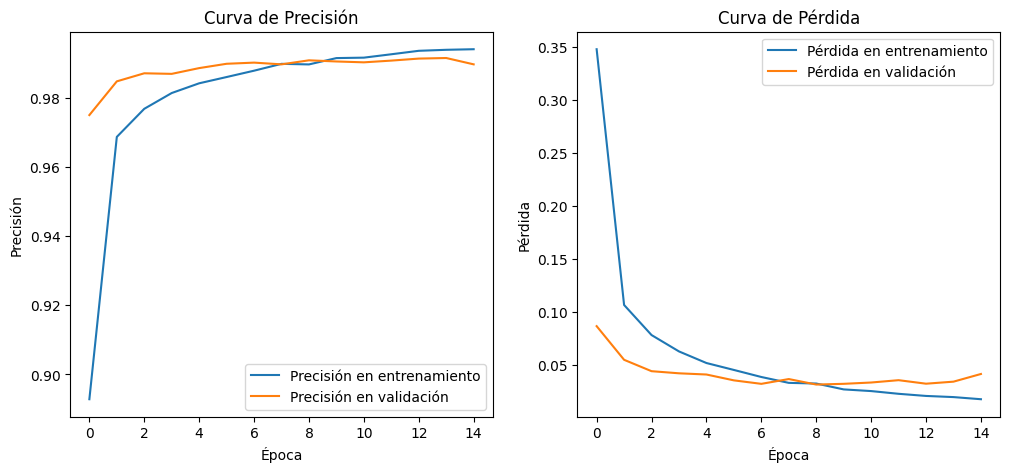

313/313 - 1s - loss: 0.0260 - accuracy: 0.9926 - 615ms/epoch - 2ms/step
Exactitud en el conjunto de prueba: 0.9926000237464905


In [ ]:
# Gráficas de entrenamiento y validación
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Precisión en validación')
plt.title('Curva de Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history_cnn.history['val_loss'], label='Pérdida en validación')
plt.title('Curva de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Evaluación del modelo
test_loss, test_acc = model_cnn.evaluate(x_test, y_test, verbose=2)
print(f'Exactitud en el conjunto de prueba: {test_acc}')

## Visualización de Resultados



Visualizaremos algunas predicciones del modelo junto con los valores reales para ver cómo se comporta nuestra CNN en la práctica.

1/1 [==============================] - 0s 234ms/step


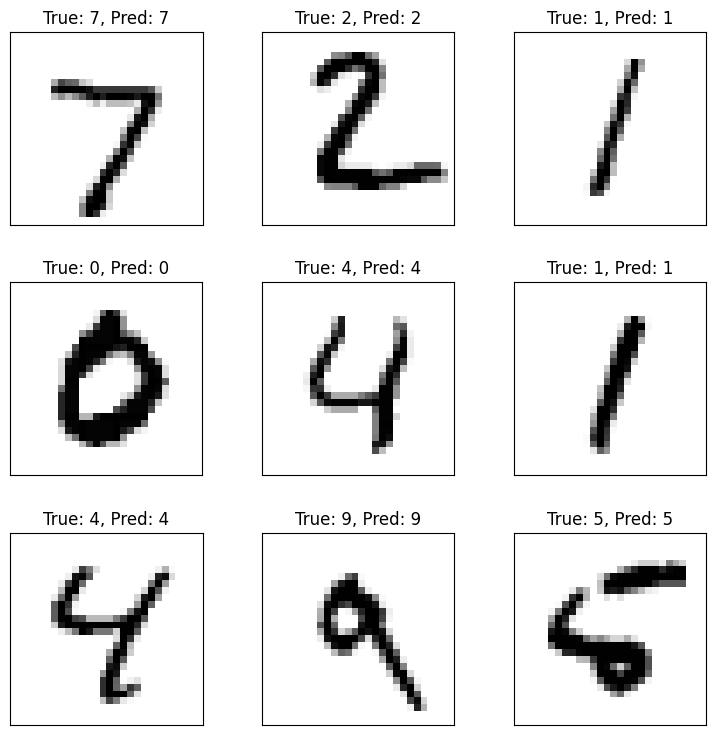

In [ ]:
# Función para visualizar resultados
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9

    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='binary')
        if cls_pred is None:
            ax_title = "True: {0}".format(cls_true[i])
        else:
            ax_title = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_title(ax_title)
        ax.set_xticks([])
        ax.set_yticks([])

# Obtener imágenes de prueba
images = x_test[0:9]

# Obtener etiquetas de clase verdaderas
cls_true = y_test[0:9]

# Obtener las predicciones de clase
cls_pred = model_cnn.predict(images)
cls_pred = np.argmax(cls_pred, axis=1)

plot_images(images, cls_true, cls_pred)

## Métricas de evaluación - Matriz de Confusión


Utilizamos Seaborn para crear una visualización de la matriz de confusión y mejorar la interpretación de los resultados del modelo.

313/313 [==============================] - 1s 2ms/step


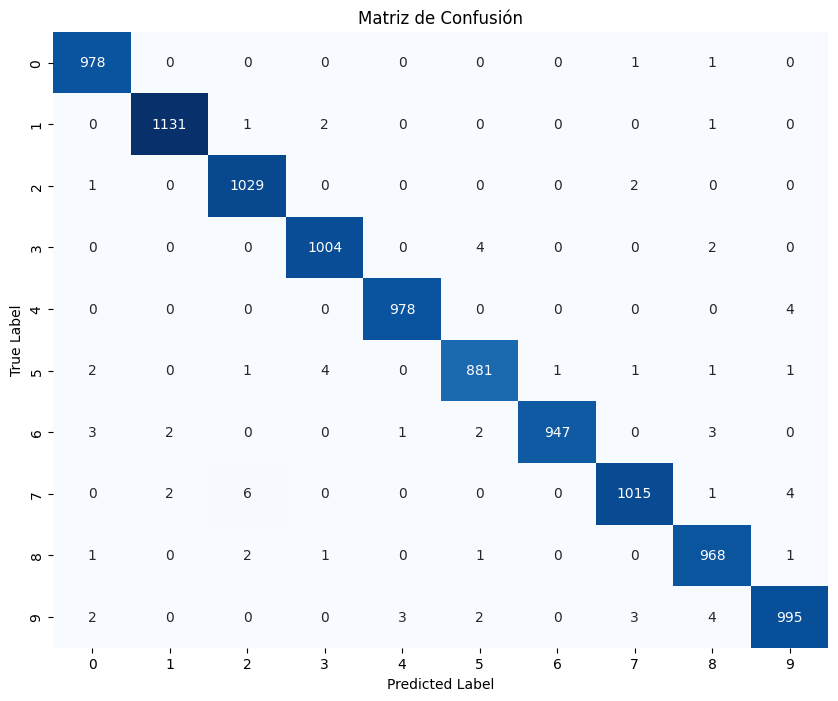

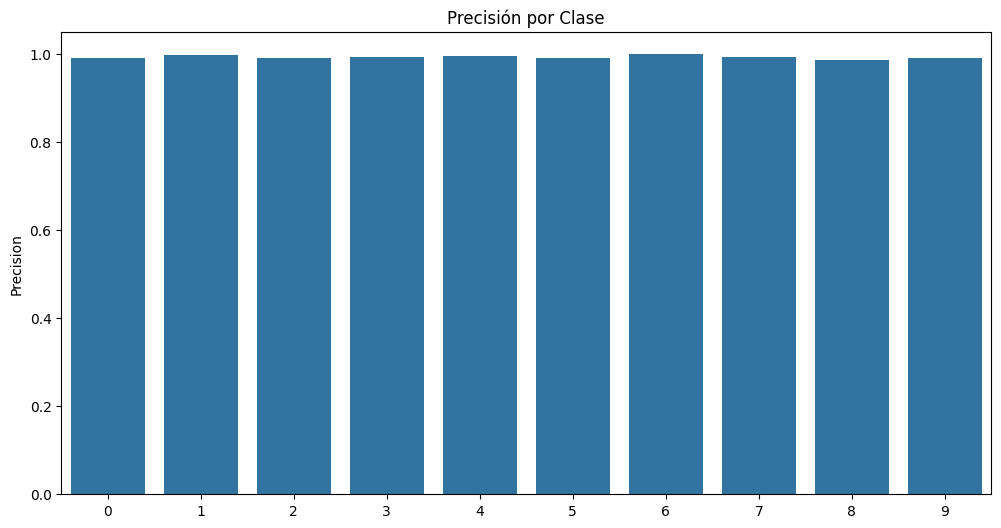

In [ ]:
# Obteniendo la matriz de confusión y el reporte de clasificación
predictions = model_cnn.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_test, predicted_classes)
clas_report = classification_report(y_test, predicted_classes, output_dict=True)

# Visualización de la matriz de confusión con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()

# Visualización del reporte de clasificación
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=list(clas_report.keys())[:-3], y=[d['precision'] for d in list(clas_report.values())[:-3]], ax=ax)
ax.set_ylabel('Precision')
ax.set_title('Precisión por Clase')
plt.show()

## Visualización de casos donde el modelo no performa correctamente

313/313 [==============================] - 1s 2ms/step


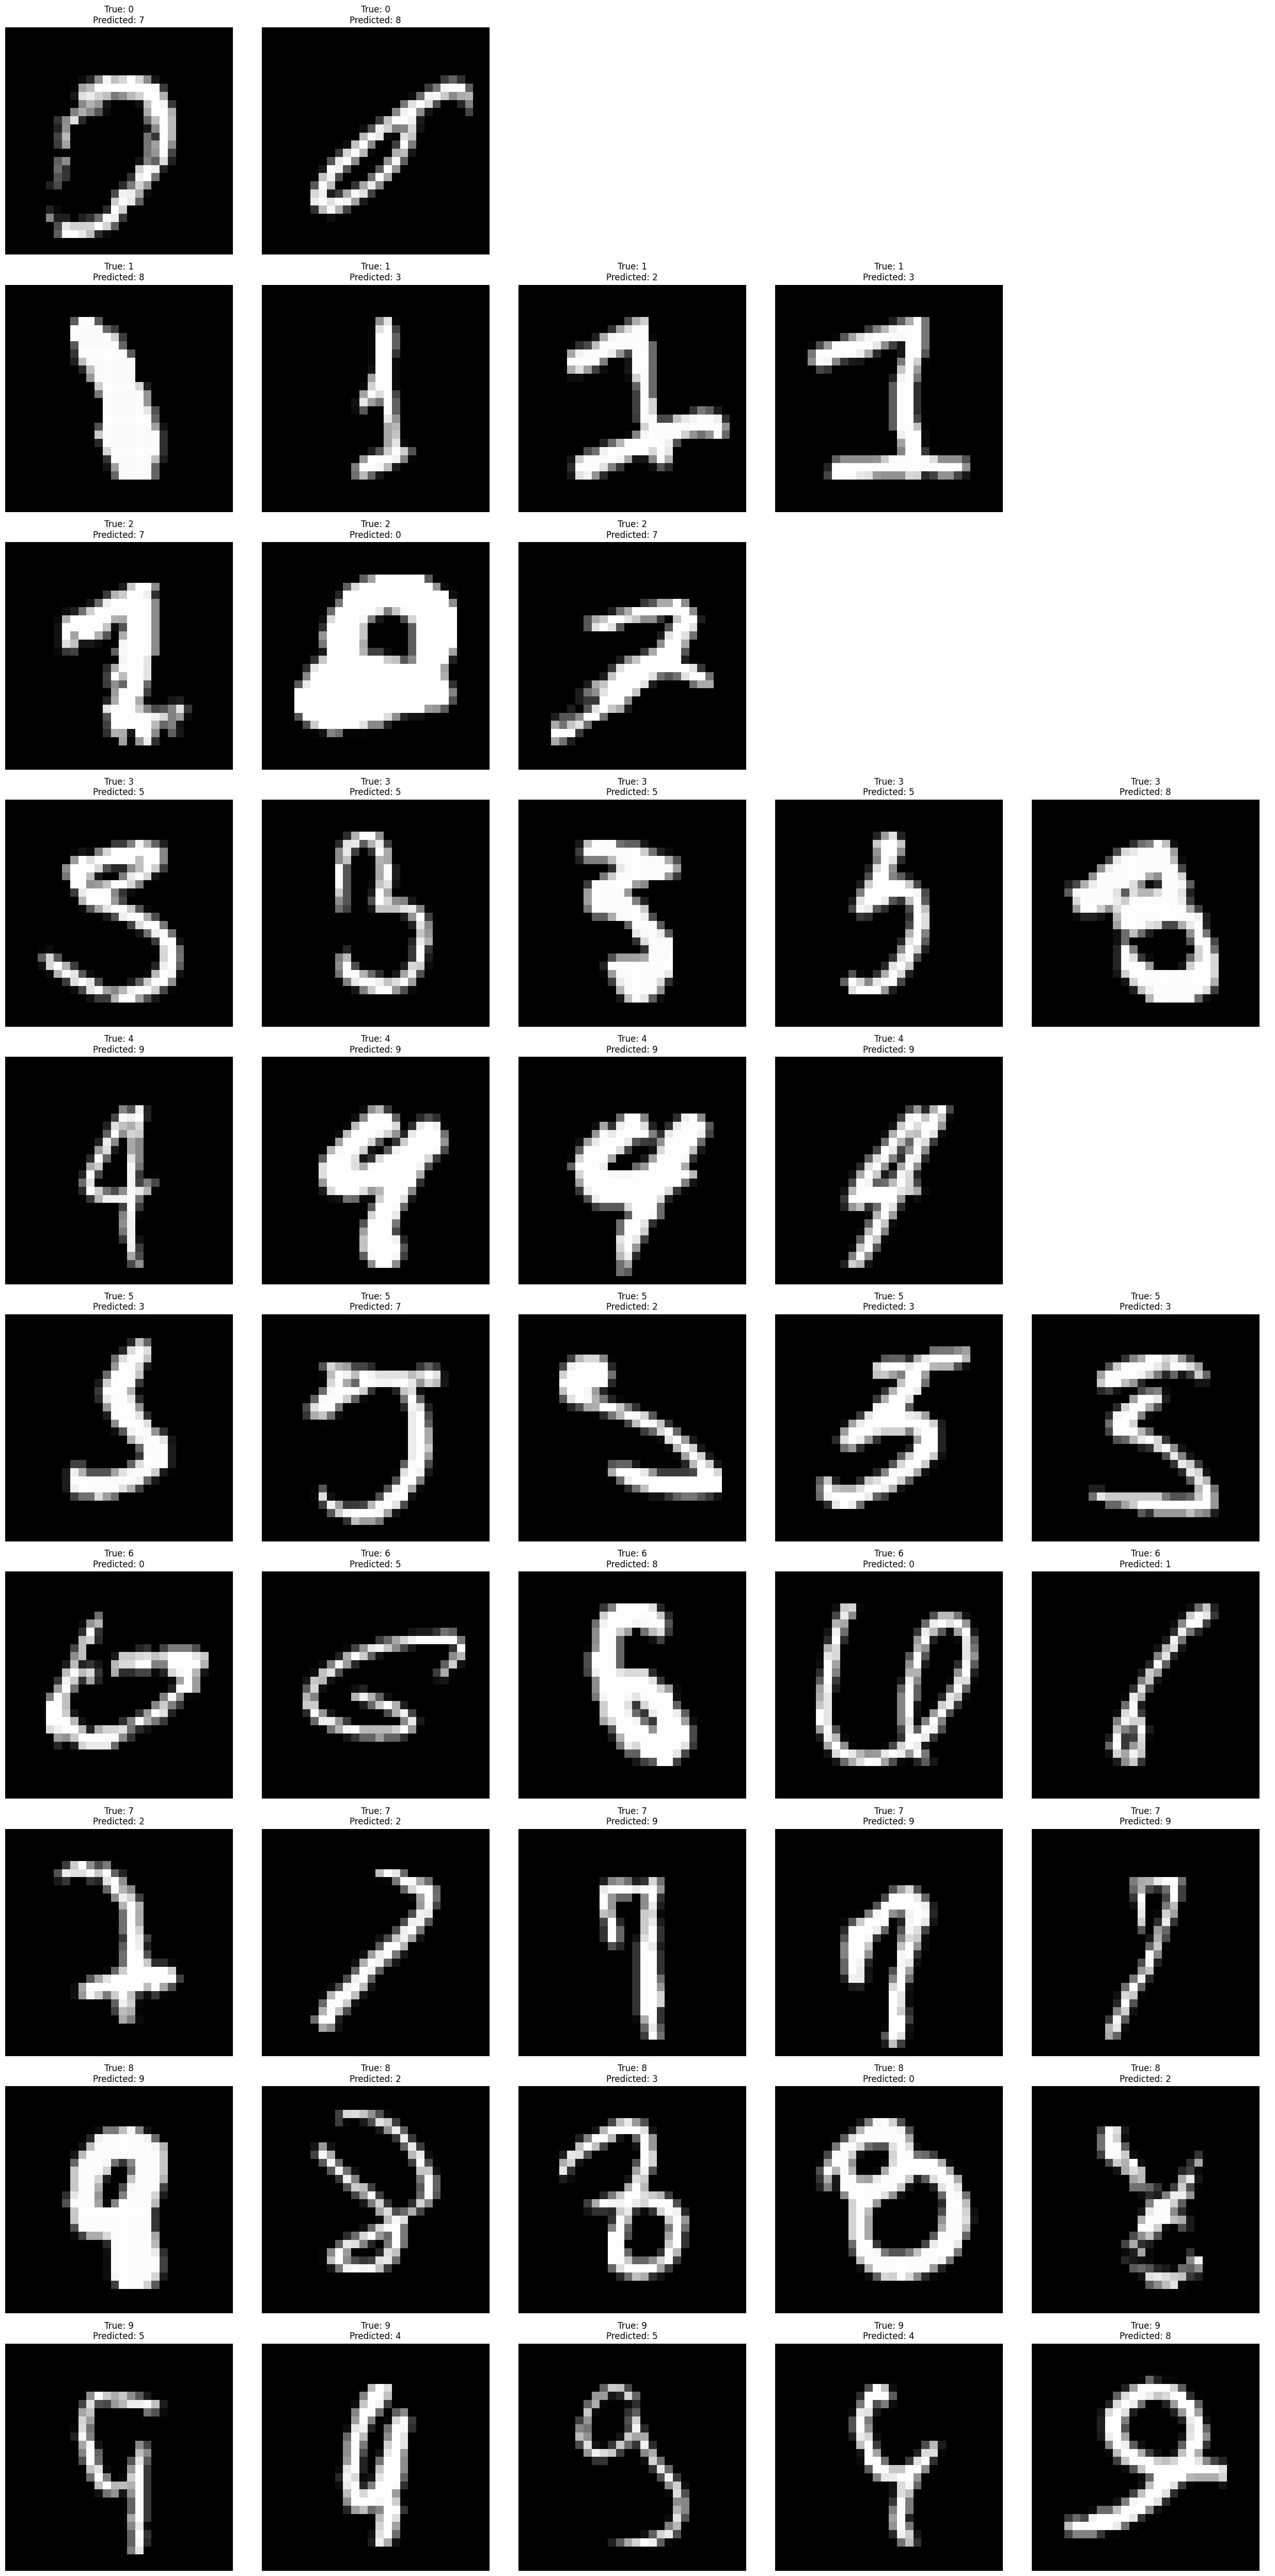

In [ ]:
# Continuación de la función para mostrar las imágenes mal clasificadas de cada clase
def plot_misclassified_images(model, images, true_labels, predicted_labels, class_names, max_images=5):
    misclassified_idx = np.where(predicted_labels != true_labels)[0]
    num_classes = len(class_names)
    fig, axes = plt.subplots(num_classes, max_images, figsize=(5*max_images, 5*num_classes))

    for i in range(num_classes):
        class_misclassified_idx = misclassified_idx[true_labels[misclassified_idx] == i]
        if not class_misclassified_idx.size:
            continue
        for j in range(max_images):
            if j < len(class_misclassified_idx):
                img_idx = class_misclassified_idx[j]
                ax = axes[i, j] if num_classes > 1 else axes[j]
                ax.imshow(images[img_idx], cmap='gray')
                ax.set_title(f'True: {class_names[true_labels[img_idx]]}\nPredicted: {class_names[predicted_labels[img_idx]]}')
                ax.axis('off')
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Obteniendo las predicciones del modelo
predictions = model_cnn.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Define class_names if not already defined
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Mostrando las imágenes mal clasificadas
plot_misclassified_images(model_cnn, x_test, y_test, predicted_classes, class_names)

# APRECIAR QUE HAY ALGUNOS DATOS QUE PARECERÍAN MAL ETIQUETADOS.

# Uso de un modelo pre-entrenado para no armar una red convolucional de cero

## MobileNetV2: Una Arquitectura Eficiente para Visión por Computadora

MobileNetV2 es una arquitectura de red neuronal convolucional que ha sido diseñada específicamente para dispositivos móviles y aplicaciones con recursos limitados. Desarrollada por Google, esta arquitectura es la sucesora de MobileNetV1 y ofrece mejoras significativas en términos de precisión y eficiencia computacional.

### Características Principales de MobileNetV2

- **Bloques de expansión y proyección:** MobileNetV2 introduce una estructura de bloque residual conocida como "inverted residual with linear bottleneck". En estos bloques, las conexiones de entrada y salida son delgadas (bottlenecks), y la expansión ocurre dentro del bloque utilizando convoluciones ligeras separables en profundidad. Este diseño permite que la red maneje eficientemente las características a lo largo de la red mientras mantiene un bajo costo computacional.

- **Convoluciones separables en profundidad:** Esta técnica reduce significativamente el número de parámetros al separar la convolución en dos partes: una capa que aplica una única convolución 2D a cada canal de entrada seguida de una convolución 1x1 para combinar los canales. Este enfoque reduce la cantidad de cálculos necesarios sin una gran pérdida de eficacia.

- **Activaciones lineales en capas delgadas:** En los bottlenecks, MobileNetV2 utiliza activaciones ReLU6 en las capas expansivas pero omite activaciones no lineales en las capas de proyección para preservar la información en el flujo de gradiente a través de la red, lo que ayuda a mejorar el entrenamiento de la red.

### Ventajas de MobileNetV2

- **Eficiencia de recursos:** Gracias a su diseño, MobileNetV2 requiere menos recursos computacionales, lo que la hace ideal para dispositivos móviles, dispositivos de borde y situaciones donde los recursos de computación son una limitación.

- **Rápido procesamiento de imágenes:** MobileNetV2 puede procesar imágenes rápidamente, lo que es esencial para aplicaciones en tiempo real que requieren respuestas rápidas, como aplicaciones de realidad aumentada y asistentes virtuales.

- **Flexibilidad:** Aunque está optimizada para eficiencia, MobileNetV2 sigue siendo lo suficientemente flexible y potente como para ser utilizada en una amplia gama de aplicaciones de visión por computadora, desde la clasificación de imágenes hasta la detección de objetos y más allá.

### Uso en Proyectos

MobileNetV2 puede ser una excelente opción para proyectos que requieren un buen equilibrio entre velocidad y precisión. Su capacidad para ser entrenada en un conjunto de datos como ImageNet y luego adaptarse a tareas más específicas (mediante técnicas como el fine-tuning) la hace extremadamente versátil para diversos desafíos en visión por computadora.

En resumen, MobileNetV2 representa un avance significativo en el diseño de redes neuronales para aplicaciones que necesitan ser eficientes y efectivas, haciendo posible la implementación de modelos de aprendizaje profundo avanzados en una amplia gama de dispositivos y plataformas.

## Importar Librerías Necesarias
Para comenzar, importamos todas las bibliotecas necesarias para cargar y procesar el dataset MNIST, modificar y entrenar MobileNetV2, así como para realizar el aprendizaje y la evaluación del modelo.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import torch.nn as nn
import torch.optim as optim
from torchvision.models import mobilenet_v2

## Preparar el DataLoader para MNIST
Configuramos las transformaciones para adaptar las imágenes del MNIST para MobileNetV2, que requiere imágenes de 224x224 píxeles en 3 canales. Además, normalizamos las imágenes según los parámetros usados comúnmente para imágenes preentrenadas en ImageNet.

In [ ]:
# Transformaciones para expandir y normalizar las imágenes MNIST
transform = transforms.Compose([
    transforms.Resize(224),  # Redimensionar la imagen para que se ajuste a MobileNetV2
    transforms.Grayscale(3),  # Convertir la imagen a 3 canales
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Cargar los datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Crear los DataLoaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 37417672.40it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1051598.15it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9675092.26it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5554090.02it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Adaptar MobileNetV2 para MNIST
Cargamos el modelo MobileNetV2 preentrenado y modificamos la última capa clasificadora para producir 10 salidas, una para cada clase del MNIST. También aseguramos que el modelo se ejecute en GPU si está disponible.

In [ ]:
#

In [ ]:
# Cargar MobileNetV2 preentrenado
model = mobilenet_v2(pretrained=True)

# Congelar todas las capas del modelo para no entrenarlas nuevamente
for param in model.parameters():
    param.requires_grad = False

# Modificar la última capa para 10 clases de MNIST
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 10)
model.classifier[1].requires_grad = True  # Asegurarse de que la última capa es entrenable

# Mover el modelo a GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 100MB/s] 


## Definir función de pérdida y optimizador para el modelo
Definimos la función de pérdida y el optimizador que se usarán para entrenar MobileNetV2. Utilizamos la pérdida de entropía cruzada y el optimizador Adam.


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Asegurarse de que CuDNN esté habilitado para optimizaciones
torch.backends.cudnn.enabled = True

## Entrenamiento del modelo
Entrenamos el modelo usando el DataLoader, que carga las imágenes en lotes. Este proceso se repite para un número definido de épocas.

In [ ]:
# Función para el entrenamiento
def train_model(num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')

# Entrenar el modelo
train_model(3)

Epoch 1, Loss: 0.43739300057577934
Epoch 2, Loss: 0.21241172064723238
Epoch 3, Loss: 0.18221392587367405


## Evaluación del Modelo
Evaluamos el modelo en el conjunto de pruebas para verificar su precisión, utilizando el DataLoader para procesar las imágenes en lotes.


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')

Accuracy: 95.84%


In [ ]:
# Suponiendo que 'model' es tu modelo y 'test_loader' es tu DataLoader para el conjunto de prueba
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

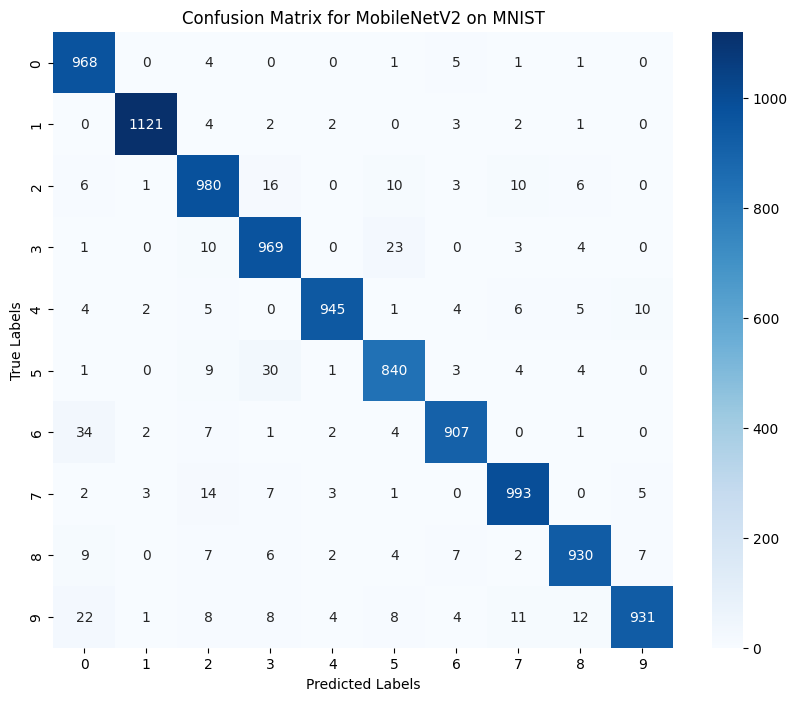

In [ ]:
# Calcular la matriz de confusión
conf_mat = confusion_matrix(all_labels, all_preds)

# Dibujar la matriz de confusión usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix for MobileNetV2 on MNIST')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Conclusión comparativa: Diseño de CNN desde cero vs Uso de Modelos Preentrenados

Al enfrentarnos al desafío de implementar soluciones de visión por computadora, tenemos dos caminos principales: diseñar una red neuronal convolucional (CNN) desde cero o aprovechar los modelos ya preentrenados. Cada enfoque tiene sus ventajas y desventajas y puede ser más conveniente en diferentes escenarios.

### Diseño de CNN desde Cero

**Ventajas:**
- **Personalización Completa:** Al construir tu propia CNN, tienes control total sobre la arquitectura, lo que te permite ajustar cada capa y parámetro para tu caso específico.
- **Eficiencia de Recursos:** Los modelos diseñados desde cero pueden ser menos demandantes en recursos, ya que se adaptan específicamente a la complejidad del problema en cuestión.
- **Comprensión Profunda:** El proceso de diseño y entrenamiento ofrece una comprensión más profunda de cómo las diferentes capas afectan el rendimiento y la capacidad de la red.

**Desventajas:**
- **Tiempo de Desarrollo:** Crear una CNN desde cero requiere más tiempo y esfuerzo, especialmente en la fase de prueba y error para encontrar la arquitectura óptima.
- **Necesidad de Datos:** Para entrenar una red desde cero, se necesita una cantidad significativa de datos etiquetados, lo cual puede ser un obstáculo importante.
- **Riesgo de Overfitting:** Sin un diseño cuidadoso y una regularización adecuada, las redes personalizadas pueden sobreajustarse fácilmente, especialmente en conjuntos de datos más pequeños.

### Uso de Modelos Preentrenados

**Ventajas:**
- **Rapidez de Implementación:** Utilizar un modelo preentrenado puede ser mucho más rápido, ya que gran parte del trabajo de diseño y entrenamiento inicial ya se ha realizado.
- **Transferencia de Aprendizaje:** Los modelos preentrenados se benefician del aprendizaje transferido de conjuntos de datos amplios y diversos, lo que mejora su capacidad de generalización.
- **Menos Datos Requeridos:** Pueden ser efectivos incluso con una cantidad limitada de datos de entrenamiento, lo que los hace ideales para problemas con restricciones de datos.

**Desventajas:**
- **Sobredimensionamiento:** Los modelos preentrenados suelen ser grandes y pueden ser excesivos para problemas simples, lo que lleva a un uso ineficiente de recursos.
- **Flexibilidad Limitada:** La adaptación de estos modelos a problemas específicos puede ser limitada, especialmente si la tarea difiere significativamente de las tareas originales para las que fueron entrenados.
- **Dependencia de la Arquitectura Original:** Puede haber dependencia de decisiones de diseño inherentes a la arquitectura preentrenada que no sean óptimas para la nueva tarea.

### ¿Qué Enfoque es más Conveniente?

El enfoque a elegir depende de varios factores, incluyendo la cantidad de datos disponibles, los recursos computacionales, el tiempo y la experiencia del equipo de desarrollo, y la naturaleza del problema específico a resolver. Si se dispone de recursos limitados y se necesita una solución rápidamente, opt


# Conclusiones

En esta notebook, hemos explorado cómo las CNN superan en rendimiento a los modelos MLP tradicionales en tareas de clasificación de imágenes, gracias a su capacidad para extraer características relevantes mediante las capas convolucionales y de pooling. Estos resultados nos ayudan a entender mejor por qué las CNN son una herramienta fundamental en el campo de la visión por computadora.

# Extras

## Pooling en Redes Convolucionales

###Diferencias entre Max Pooling y Average Pooling

**Max Pooling**
Selecciona el valor máximo de cada sub-región del mapa de características.

Cuándo usarlo:
Cuando se necesitan destacar las características más fuertes y distintivas.
Es útil en la detección de características y en la reducción de la sensibilidad espacial.

Ventajas:
Proporciona invarianza a pequeñas traslaciones y distorsiones.
Ayuda a evitar el sobreajuste al simplificar la información.

**Average Pooling**
Calcula el promedio de los valores en cada sub-región del mapa de características.

Cuándo usarlo:
Cuando se desea una representación más suavizada de las características.
Útil en tareas donde las características globales son más importantes que las características locales extremas.

Ventajas:
Reduce el riesgo de sobreajuste al proporcionar una característica más generalizada.
Menos agresivo que el max pooling, conservando más información del entorno.

## Capas de Normalización

###Tipos de Capas de Normalización

**Batch Normalization:** Normaliza la salida de una capa previa sustrayendo la media del batch y dividiéndola por la desviación estándar.

**Layer Normalization:** Normaliza los datos a lo largo de las características en lugar de a lo largo del batch.

**Instance Normalization:** Similar a la layer normalization pero normaliza las instancias individualmente, común en tareas de estilo y generación de imágenes.

**Group Normalization:** Divide los canales en grupos y normaliza estos grupos, útil cuando los tamaños de batch son pequeños.

###Importancia de la Normalización

- Ayuda a acelerar la convergencia durante el entrenamiento.
- Reduce el problema del gradiente desvaneciente.
- Permite el uso de tasas de aprendizaje más altas.
- Actúa como un regularizador, disminuyendo el sobreajuste.

### Ubicación en la Red

Generalmente se colocan después de las capas convolucionales y antes de las funciones de activación.

## Funciones de Activación para Capas Convolucionales

**ReLU (Rectified Linear Unit)**

Función: f(x)=max(0,x)
Ventajas: Simple, reduce el problema del gradiente desvaneciente en redes profundas.

### Variantes de ReLU

**Leaky ReLU:** Permite una pequeña pendiente cuando x < 0, útil para mantener activas algunas neuronas durante el entrenamiento.

**PReLU (Parametric ReLU):** La pendiente en x < 0 es aprendida durante el entrenamiento, lo que puede proporcionar un ajuste más flexible a los datos.

**ELU (Exponential Linear Unit):** Ofrece una transición suave en negativos para acelerar la convergencia.

## Concepto de Batch Normalization

Propósito: Reduce el "internal covariate shift" al normalizar las salidas de las capas anteriores durante el entrenamiento.

Mecanismo: Usa estadísticas del batch actual para normalizar la entrada, aplicando una transformación que mantiene la media cerca de 0 y la desviación estándar cerca de 1.

Beneficios:

- Facilita el uso de tasas de aprendizaje más altas.
- Mejora la estabilidad del entrenamiento.
- Actúa como un regularizador ligero para reducir el sobreajuste.